In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC


Telecom_dummies = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data_dummies.csv')


In [ ]:
Telecom_dummies.head()
df=Telecom_dummies.drop("Unnamed: 0" , axis=1)


In [ ]:
x = df.drop("Churn" , axis=1)
y = df['Churn']
y.shape

(7032,)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.3)



# **SVM MODEL**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = SVC(kernel='linear' , random_state=100 , probability=True)
model.fit(x_train_scaled, y_train)
y_preds = model.predict(x_test_scaled)


print("\nAccuracy:")
print(metrics.accuracy_score(y_test, y_preds))


# Display more comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_test, y_preds))






Accuracy:
0.795734597156398

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1601
           1       0.60      0.45      0.52       509

    accuracy                           0.80      2110
   macro avg       0.72      0.68      0.69      2110
weighted avg       0.78      0.80      0.79      2110



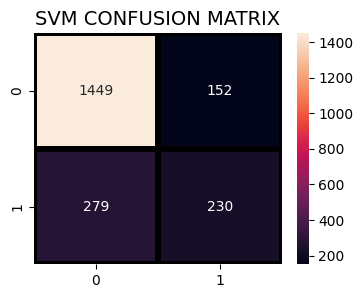

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_preds ),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("SVM CONFUSION MATRIX",fontsize=14)
plt.show()

Sensitivity: 0.4518664047151277 Specificity: 0.9050593379138039


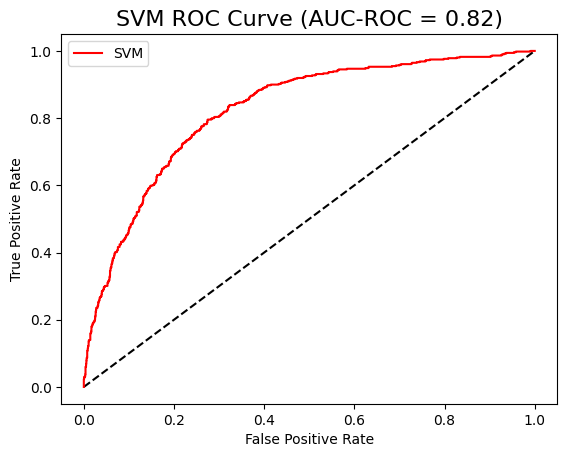

In [ ]:

from sklearn.metrics import roc_auc_score

y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVM', color="r")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return sensitivity, specificity

sensitivity_svm, specificity_svm = calculate_sensitivity_specificity(y_test,y_preds )
print("Sensitivity:", sensitivity_svm, "Specificity:", specificity_svm)


# Add AUC-ROC value to the title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'SVM ROC Curve (AUC-ROC = {auc_roc:.2f})', fontsize=16)
plt.legend()
plt.show()

# **Neural Network Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming x and y are your feature matrix and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


model = MLPClassifier(hidden_layer_sizes=(32, 8), max_iter=100, random_state=42)

# Train the model
model.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Neural Network Accuracy:", accuracy)

# Display more comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Neural Network Accuracy: 0.783226723525231

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.61      0.52      0.56       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


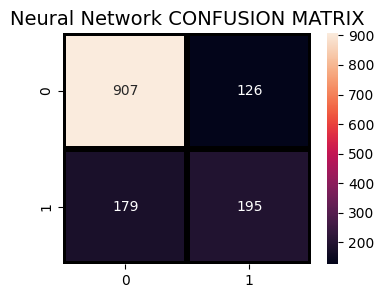

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred ),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("Neural Network CONFUSION MATRIX",fontsize=14)
plt.show()



Sensitivity: 0.5213903743315508 Specificity: 0.8780251694094869


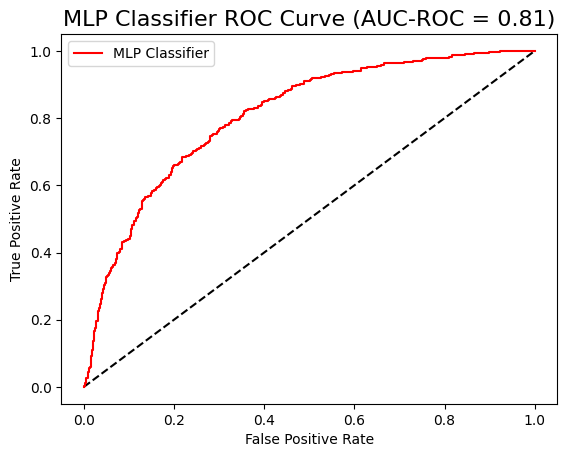

In [ ]:

from sklearn.metrics import roc_auc_score

y_pred_prob = model.predict_proba(x_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='MLP Classifier', color="r")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_prob)
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return sensitivity, specificity

sensitivity_MLPclassifier, specificity_MLPclassifier = calculate_sensitivity_specificity(y_test,y_pred )
print("Sensitivity:", sensitivity_MLPclassifier, "Specificity:", specificity_MLPclassifier)


# Add AUC-ROC value to the title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'MLP Classifier ROC Curve (AUC-ROC = {auc_roc:.2f})', fontsize=16)
plt.legend()
plt.show()